In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
forex = pd.read_csv("completehour-p10.csv",index_col="Time")

In [3]:
forex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328 entries, 2019-04-01 00:00 to 2019-10-11 16:00
Data columns (total 5 columns):
Max      3328 non-null float64
Min      3328 non-null float64
SMA      3328 non-null float64
RSI      3328 non-null float64
Value    3328 non-null float64
dtypes: float64(5)
memory usage: 156.0+ KB


In [4]:
forex.index = forex.index.to_datetime()

/Users/admin/miniconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


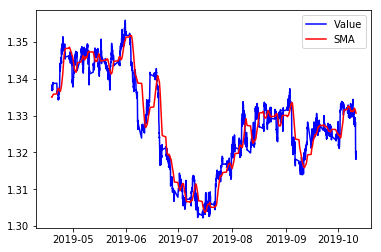

In [5]:
qnt = 3000

plt.plot(forex.index[-qnt:],forex.Value[-qnt:],'b',label='Value')

plt.plot(forex.index[-qnt:],forex.SMA[-qnt:],'r',label='SMA')

plt.legend()

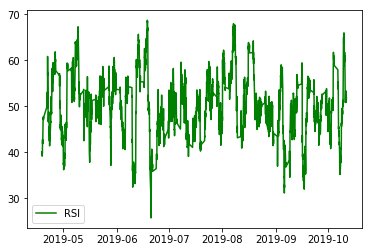

In [6]:
plt.plot(forex.index[-qnt:],forex.RSI[-qnt:],'g',label='RSI')

plt.legend()

In [7]:
forex.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Max,3328.0,1.329088,0.012503,1.302210,1.320612,1.330065,1.338067,1.355960
Min,3328.0,1.328890,0.012495,1.302130,1.320475,1.329820,1.337915,1.355850
SMA,3328.0,1.329058,0.012278,1.303653,1.321078,1.329944,1.337380,1.351750
RSI,3328.0,49.813907,6.981071,0.000000,45.435786,49.646714,54.376989,68.694537
Value,3328.0,1.328988,0.012498,1.302200,1.320490,1.329955,1.337952,1.355860


In [8]:
# forex = forex.reset_index(drop=True)

In [9]:
x_data = forex.drop(['Value'],axis=1)

In [10]:
y_val = forex['Value']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [13]:
X_train.index = [i.timestamp() for i in X_train.index]
X_test.index = [i.timestamp() for i in X_test.index]
y_train.index = [i.timestamp() for i in y_train.index]
y_test.index = [i.timestamp() for i in y_test.index]

In [14]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [15]:
# X_train = X_train.reset_index(drop=False)
# X_test = X_test.reset_index(drop=False)
# y_train = y_train.reset_index(drop=False)
# y_test = y_test.reset_index(drop=False)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [20]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [21]:
forex.columns

Index(['Max', 'Min', 'SMA', 'RSI', 'Value'], dtype='object')

In [22]:
import tensorflow as tf

In [23]:
max_value = tf.feature_column.numeric_column('Max')
min_value = tf.feature_column.numeric_column('Min')
sma = tf.feature_column.numeric_column('SMA')
rsi = tf.feature_column.numeric_column('RSI')

In [24]:
feat_cols = [max_value, min_value, sma, rsi]

In [25]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [26]:
model = tf.estimator.DNNRegressor(hidden_units=[6,10,10,6],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_model_dir': '/var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmpsghx016m', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None}


In [27]:
model.train(input_fn=input_func,steps=25000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmpsghx016m/model.ckpt.
INFO:tensorflow:loss = 13.497733, step = 1
INFO:tensorflow:global_step/sec: 672.961
INFO:tensorflow:loss = 0.059679337, step = 101 (0.151 sec)
INFO:tensorflow:global_step/sec: 709.855
INFO:tensorflow:loss = 0.062010236, step = 201 (0.140 sec)
INFO:tensorflow:global_step/sec: 652.401
INFO:tensorflow:loss = 0.0190535, step = 301 (0.152 sec)
INFO:tensorflow:global_step/sec: 604.405
INFO:tensorflow:loss = 0.023405269, step = 401 (0.166 sec)
INFO:tensorflow:global_step/sec: 600.651
INFO:tensorflow:loss = 0.017003668, step = 501 (0.166 sec)
INFO:tensorflow:global_step/sec: 714.087
INFO:tensorflow:loss = 0.008987448, step = 601 (0.142 sec)
INFO:tensorflow:global_step/sec: 742.594
INFO:tensorflow:loss = 0.0045507634, step = 701 (0.134 sec)
INFO:tensorflow:global_step/sec: 709.034
INFO:tensorflow:loss = 0.0029215412, step = 801 (0.141

INFO:tensorflow:loss = 1.3808099e-05, step = 7901 (0.133 sec)
INFO:tensorflow:global_step/sec: 663.13
INFO:tensorflow:loss = 7.92279e-06, step = 8001 (0.150 sec)
INFO:tensorflow:global_step/sec: 662.29
INFO:tensorflow:loss = 3.5603447e-05, step = 8101 (0.151 sec)
INFO:tensorflow:global_step/sec: 663.012
INFO:tensorflow:loss = 3.476599e-05, step = 8201 (0.151 sec)
INFO:tensorflow:global_step/sec: 701.75
INFO:tensorflow:loss = 1.7215123e-05, step = 8301 (0.144 sec)
INFO:tensorflow:global_step/sec: 660.571
INFO:tensorflow:loss = 2.2503475e-05, step = 8401 (0.151 sec)
INFO:tensorflow:global_step/sec: 666.059
INFO:tensorflow:loss = 1.9468993e-05, step = 8501 (0.150 sec)
INFO:tensorflow:global_step/sec: 656.883
INFO:tensorflow:loss = 2.2009364e-05, step = 8601 (0.151 sec)
INFO:tensorflow:global_step/sec: 764.153
INFO:tensorflow:loss = 1.3605375e-05, step = 8701 (0.132 sec)
INFO:tensorflow:global_step/sec: 671.064
INFO:tensorflow:loss = 5.9071645e-06, step = 8801 (0.148 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 663.038
INFO:tensorflow:loss = 1.7156e-05, step = 15901 (0.150 sec)
INFO:tensorflow:global_step/sec: 662.072
INFO:tensorflow:loss = 5.825265e-05, step = 16001 (0.151 sec)
INFO:tensorflow:global_step/sec: 724.302
INFO:tensorflow:loss = 2.5014013e-05, step = 16101 (0.139 sec)
INFO:tensorflow:global_step/sec: 721.344
INFO:tensorflow:loss = 3.2865762e-05, step = 16201 (0.139 sec)
INFO:tensorflow:global_step/sec: 767.561
INFO:tensorflow:loss = 8.568504e-06, step = 16301 (0.130 sec)
INFO:tensorflow:global_step/sec: 676.48
INFO:tensorflow:loss = 1.38539335e-05, step = 16401 (0.148 sec)
INFO:tensorflow:global_step/sec: 660.201
INFO:tensorflow:loss = 3.0698935e-05, step = 16501 (0.150 sec)
INFO:tensorflow:global_step/sec: 766.612
INFO:tensorflow:loss = 1.612482e-05, step = 16601 (0.132 sec)
INFO:tensorflow:global_step/sec: 643.67
INFO:tensorflow:loss = 9.446516e-06, step = 16701 (0.154 sec)
INFO:tensorflow:global_step/sec: 582.812
INFO:tensorflow:loss = 2.176952

INFO:tensorflow:loss = 9.404951e-06, step = 23801 (0.154 sec)
INFO:tensorflow:global_step/sec: 655.39
INFO:tensorflow:loss = 5.6630797e-06, step = 23901 (0.156 sec)
INFO:tensorflow:global_step/sec: 595.668
INFO:tensorflow:loss = 2.4325716e-05, step = 24001 (0.164 sec)
INFO:tensorflow:global_step/sec: 748.57
INFO:tensorflow:loss = 3.3539614e-05, step = 24101 (0.135 sec)
INFO:tensorflow:global_step/sec: 666.818
INFO:tensorflow:loss = 8.073978e-06, step = 24201 (0.150 sec)
INFO:tensorflow:global_step/sec: 661.345
INFO:tensorflow:loss = 7.0531655e-06, step = 24301 (0.150 sec)
INFO:tensorflow:global_step/sec: 663.447
INFO:tensorflow:loss = 1.6631146e-05, step = 24401 (0.151 sec)
INFO:tensorflow:global_step/sec: 719.072
INFO:tensorflow:loss = 1.7405919e-05, step = 24501 (0.140 sec)
INFO:tensorflow:global_step/sec: 776.814
INFO:tensorflow:loss = 1.1870732e-05, step = 24601 (0.129 sec)
INFO:tensorflow:global_step/sec: 715.395
INFO:tensorflow:loss = 2.6328891e-05, step = 24701 (0.140 sec)
INFO:

In [28]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [29]:
pred_gen = model.predict(predict_input_func)

In [30]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from /var/folders/pr/t9901z0n4z7dbkstysncwp0m0000gn/T/tmpsghx016m/model.ckpt-25000


In [31]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_test,final_preds)**0.5

0.0013280108089120189

In [34]:
X_train.index = [datetime.datetime.fromtimestamp(i) for i in X_train.index]
X_test.index = [datetime.datetime.fromtimestamp(i) for i in X_test.index]
y_train.index = [datetime.datetime.fromtimestamp(i) for i in y_train.index]
y_test.index = [datetime.datetime.fromtimestamp(i) for i in y_test.index]

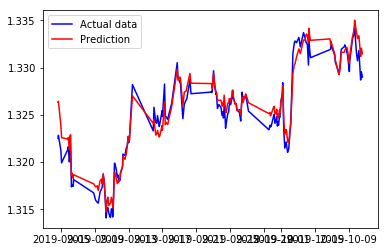

In [39]:
qnt = 200
plt.plot(y_test.index[-qnt:],y_test[-qnt:],'b',label="Actual data")
plt.plot(X_test.index[-qnt:],final_preds[-qnt:],'r',label="Prediction")

plt.legend();

In [36]:
y_test.tail(2)

2019-10-10 12:00:00    1.32955
2019-10-10 15:00:00    1.32899
Name: Value, dtype: float64

In [37]:
final_preds[-2:]

[array([1.3320432], dtype=float32), array([1.3314637], dtype=float32)]